In [1]:
import numpy as np
import os
from glob import iglob
from collections import defaultdict
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from data_extraction import *

defaultdict(<class 'list'>, {20000: [2.081563523, 2.139146123, 2.376660128, 2.184591891, 2.337187908], 15000: [2.395774738, 2.329738521, 2.22228813, 2.284702947, 2.528867614], 10000: [2.963088164, 2.877147057, 2.906848357, 2.898169888, 2.761665131], 5000: [4.351279464, 3.994421029, 4.073928242, 4.089331848, 4.132288925], 1000: [13.55979801, 13.376874181, 13.34608665, 13.45479425, 13.532603731]})
defaultdict(<class 'list'>, {20000: [1.2650000000000001, 1.3090000000000002, 1.26, 1.228, 1.25], 15000: [1.232, 1.186, 1.2429999999999999, 1.225, 1.206], 10000: [1.8130000000000002, 1.827, 1.8199999999999998, 1.803, 1.809], 5000: [2.949, 2.9559999999999995, 2.9139999999999997, 2.965, 2.981], 1000: [12.434000000000001, 12.651000000000002, 12.716000000000001, 12.286, 12.769000000000002]})


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

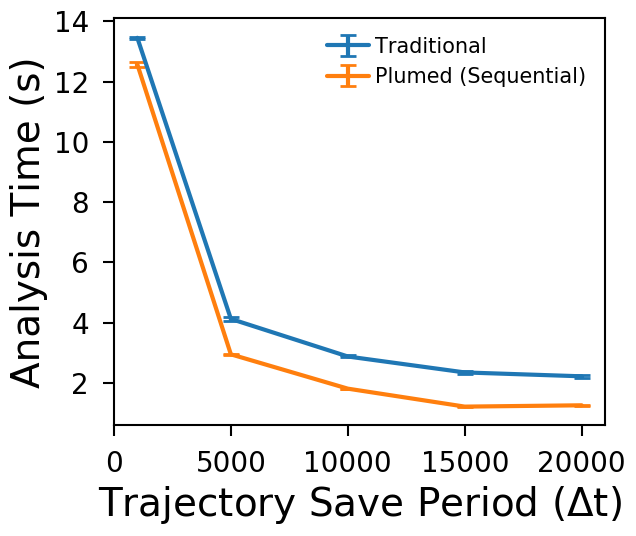

In [2]:
def timestamp_to_seconds(t):
    return sum(float(n) * m for n, m in zip(reversed(t), (1, 60, 3600)))

# This will return absolute paths
paths = {'sequential':'Traditional','sequential_in_transit':'Plumed (Sequential)'}
for path,legend in paths.items():
    total_times = defaultdict(list)
    analysis_times = defaultdict(list)
    sim_time_dict = defaultdict(list)
    log_files = [os.path.abspath(f) for f in iglob('{}/slurm*'.format(path), recursive=True)]
    for log_file in log_files:
        #print(log_file)
        L=get_L(log_file)
        N=get_N(log_file)
        #print(L,N)
        dump_interval = get_dump_interval(log_file)
        
        analysis_time=get_analysis_time(log_file,legend)
        total_time=get_total_time(log_file)
        sim_time=get_sim_time(log_file,legend)
        
        if analysis_time is not None and dump_interval is not None:
            analysis_times[dump_interval].append(analysis_time)
        
    print(analysis_times)
    mean_tts = [np.mean(analysis_time_vals) for dump_interval, analysis_time_vals in analysis_times.items()]
    std_tts = [stats.sem(analysis_time_vals) for dump_interval, analysis_time_vals in analysis_times.items()]
    dump_intervals = analysis_times.keys()
    plt.errorbar(dump_intervals,mean_tts,std_tts, 
                 #fmt='o', 
                 #ecolor='g',
                 capsize=6, 
                 #elinewidth=3,
                 capthick=2,
                label=legend)
plt.xlabel("Trajectory Save Period ($\Delta$t)")
plt.ylabel("Analysis Time (s)")
plt.legend(fontsize=15)
#plt.ylim(0,35)
plt.xlim(0,21000)
plt.savefig('figure_analysis_time.png', transparent=True)
plt.show()

defaultdict(<class 'list'>, {15: [13.594616588, 13.499292562, 13.383868713, 13.638869569, 13.71488065], 30: [127.767056055, 124.284463784, 127.449548501, 124.036763705, 123.89338149], 60: [1135.476230054, 1146.176451735, 1125.792238601, 1103.418878872, 1110.199532801]})
N dict_keys([15, 30, 60])
defaultdict(<class 'list'>, {15: [12.202999999999996, 12.395000000000003, 12.735999999999997, 12.438, 12.812999999999999], 30: [122.869, 128.143, 125.44600000000003, 122.927, 123.16499999999998], 60: [1143.46, 1145.0240000000001, 1149.154, 1170.0720000000001, 1144.051]})
N dict_keys([15, 30, 60])


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


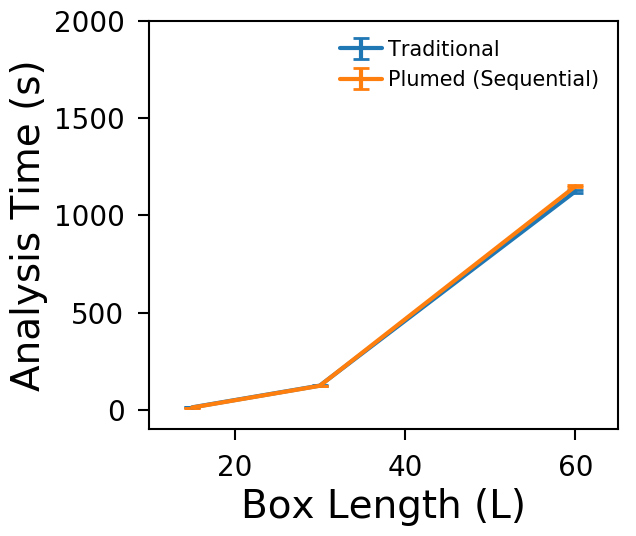

In [10]:
import numpy as np
import os
from glob import iglob
from collections import defaultdict
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

def timestamp_to_seconds(t):
    return sum(float(n) * m for n, m in zip(reversed(t), (1, 60, 3600)))

# This will return absolute paths
paths = {'sequential_vary_N':'Traditional','sequential_in_transit_vary_N':'Plumed (Sequential)'}
for path,legend in paths.items():
    total_times = defaultdict(list)
    analysis_times = defaultdict(list)
    sim_time_dict = defaultdict(list)
    log_files = [os.path.abspath(f) for f in iglob('{}/slurm*'.format(path), recursive=True)]
    for log_file in log_files:
        #print(log_file)
        total_time=None
        analysis_time=0
        dump_interval = None
        L=0
        N=None
        sim_times=[]
        with open(log_file) as fp:
            line = fp.readline()
            #print(line)
            while line:
                if 'ETE_TIME' in line:
                    values = line.split(':')
                    total_time = float(values[1])
                if 'Created orthogonal box =' in line:
                    values = line.split(' ')
                    L = int(values[-2])
                    #print(L)
                if 'Created ' in line:
                    values = line.split(' ')
                    if values[2] == 'atoms\n':
                        N = float(values[1])
                        #print('N:',N)
                if 'DUMP_INTERVAL' in line:
                    values = line.split(':')
                    if float(values[1]) >500:
                        dump_interval = float(values[1])
                if 'Total wall time' in line:
                    values = line.split(':')
                    sim_time = float(timestamp_to_seconds(values[1:]))
                    sim_times.append(sim_time)
                    
                if legend == 'Plumed (Sequential)':
                    if False:
                        analysis_time_labels = ['Modify','Ouput']#'Pair','Neigh']#,'Comm','Other']#,'Modify','Ouput']
                        values = line.split('|')
                        if len(values)== 6 and any(label in values[0] for label in analysis_time_labels):
                                values = line.split('|')
                                analysis_time += float(values[2]) # Adding up times for all the analysis_time_labels
                    else:
                        if 'DISPATCH_UPDATE_TIME_rank_0' in line:
                            values = line.split(':')
                            #print(line)
                            analysis_time += float(values[1])/1e3 # convert millisecond to second
                        
                elif legend == 'Traditional':
                    if 'ANALYZE_TIME' in line:
                        #print(N,line)
                        values = line.split(':')
                        analysis_time = float(values[1])
                    
                line = fp.readline()
            if analysis_time >0 and dump_interval is not None and N is not None:
                analysis_times[L].append(analysis_time)
        if len(sim_times)>0 and dump_interval is not None:
            #print(log_file)
            sim_time_dict[dump_interval].append(sim_times[-1])
        else:
            #print('Could not find sim time in ',log_file)
            continue
    print(analysis_times)
    mean_tts = [np.mean(analysis_time_vals) for dump_interval, analysis_time_vals in analysis_times.items()]
    std_tts = [stats.sem(analysis_time_vals) for dump_interval, analysis_time_vals in analysis_times.items()]
    dump_intervals = analysis_times.keys()
    print('N',dump_intervals)
    plt.errorbar(dump_intervals,mean_tts,std_tts, 
                 #fmt='o', 
                 #ecolor='g',
                 capsize=6, 
                 #elinewidth=3,
                 capthick=2,
                label=legend)
plt.xlabel("Box Length (L)")
plt.ylabel("Analysis Time (s)")
plt.legend(fontsize=15)
plt.ylim(-100,2000)
plt.xlim(10,65)
plt.savefig('figure_analysis_time_vary_N.png', transparent=True)
plt.show()

defaultdict(<class 'list'>, {15: [13.594616588, 13.499292562, 13.383868713, 13.638869569, 13.71488065], 30: [127.767056055, 124.284463784, 127.449548501, 124.036763705, 123.89338149], 60: [1135.476230054, 1146.176451735, 1125.792238601, 1103.418878872, 1110.199532801]})
N dict_keys([15, 30, 60])
defaultdict(<class 'list'>, {15: [12.180000000000001, 12.349, 12.61, 12.173999999999998, 12.716999999999999], 30: [126.82200000000002, 122.55599999999998, 123.482, 123.81500000000001, 122.96200000000002], 60: [1150.5800000000002, 1139.522, 1172.34, 1146.5649999999998, 1147.0249999999999]})
N dict_keys([15, 30, 60])


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


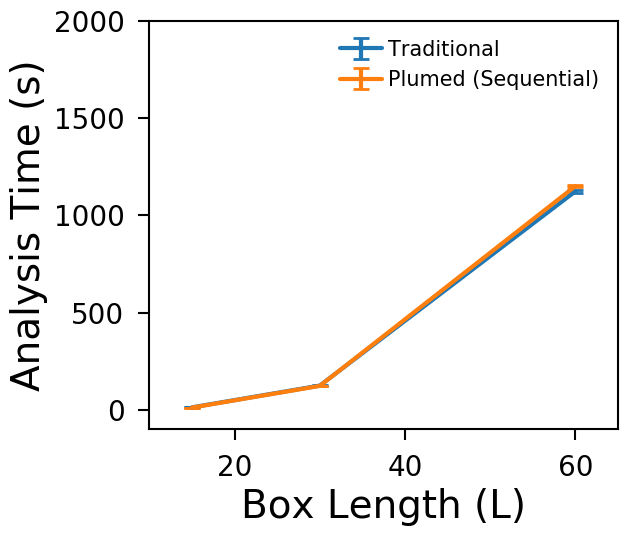

In [11]:


import numpy as np
import os
from glob import iglob
from collections import defaultdict
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

def timestamp_to_seconds(t):
    return sum(float(n) * m for n, m in zip(reversed(t), (1, 60, 3600)))

# This will return absolute paths
paths = {'sequential_vary_N':'Traditional','sequential_in_transit_vary_N_analysis_exclude_data_assembly':'Plumed (Sequential)'}
for path,legend in paths.items():
    total_times = defaultdict(list)
    analysis_times = defaultdict(list)
    sim_time_dict = defaultdict(list)
    log_files = [os.path.abspath(f) for f in iglob('{}/slurm*'.format(path), recursive=True)]
    for log_file in log_files:
        #print(log_file)
        total_time=None
        analysis_time=0
        dump_interval = None
        L=0
        N=None
        sim_times=[]
        with open(log_file) as fp:
            line = fp.readline()
            #print(line)
            while line:
                if 'ETE_TIME' in line:
                    values = line.split(':')
                    total_time = float(values[1])
                if 'Created orthogonal box =' in line:
                    values = line.split(' ')
                    L = int(values[-2])
                    #print(L)
                if 'Created ' in line:
                    values = line.split(' ')
                    if values[2] == 'atoms\n':
                        N = float(values[1])
                        #print('N:',N)
                if 'DUMP_INTERVAL' in line:
                    values = line.split(':')
                    if float(values[1]) >500:
                        dump_interval = float(values[1])
                if 'Total wall time' in line:
                    values = line.split(':')
                    sim_time = float(timestamp_to_seconds(values[1:]))
                    sim_times.append(sim_time)
                    
                if legend == 'Plumed (Sequential)':
                    if False:
                        analysis_time_labels = ['Modify','Ouput']#'Pair','Neigh']#,'Comm','Other']#,'Modify','Ouput']
                        values = line.split('|')
                        if len(values)== 6 and any(label in values[0] for label in analysis_time_labels):
                                values = line.split('|')
                                analysis_time += float(values[2]) # Adding up times for all the analysis_time_labels
                    else:
                        if 'DISPATCH_UPDATE_TIME_rank_0' in line:
                            values = line.split(':')
                            #print(line)
                            analysis_time += float(values[1])/1e3 # convert millisecond to second
                        
                elif legend == 'Traditional':
                    if 'ANALYZE_TIME' in line:
                        #print(N,line)
                        values = line.split(':')
                        analysis_time = float(values[1])
                    
                line = fp.readline()
            if analysis_time >0 and dump_interval is not None and N is not None:
                analysis_times[L].append(analysis_time)
        if len(sim_times)>0 and dump_interval is not None:
            #print(log_file)
            sim_time_dict[dump_interval].append(sim_times[-1])
        else:
            #print('Could not find sim time in ',log_file)
            continue
    print(analysis_times)
    mean_tts = [np.mean(analysis_time_vals) for dump_interval, analysis_time_vals in analysis_times.items()]
    std_tts = [stats.sem(analysis_time_vals) for dump_interval, analysis_time_vals in analysis_times.items()]
    dump_intervals = analysis_times.keys()
    print('N',dump_intervals)
    plt.errorbar(dump_intervals,mean_tts,std_tts, 
                 #fmt='o', 
                 #ecolor='g',
                 capsize=6, 
                 #elinewidth=3,
                 capthick=2,
                label=legend)
plt.xlabel("Box Length (L)")
plt.ylabel("Analysis Time (s)")
plt.legend(fontsize=15)
plt.ylim(-100,2000)
plt.xlim(10,65)
plt.savefig('figure_analysis_time_vary_N_excludes_data_assembly.png', transparent=True)
plt.show()